In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df_movie_info = pd.read_csv('data/rt.movie_info.tsv.gz', sep='\t')
df_movie_info.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


In [3]:
df_movie_info = df_movie_info.dropna(subset=['box_office'])

In [4]:
df_movie_info.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 340 entries, 1 to 1555
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            340 non-null    int64 
 1   synopsis      340 non-null    object
 2   rating        340 non-null    object
 3   genre         340 non-null    object
 4   director      299 non-null    object
 5   writer        273 non-null    object
 6   theater_date  334 non-null    object
 7   dvd_date      334 non-null    object
 8   currency      340 non-null    object
 9   box_office    340 non-null    object
 10  runtime       338 non-null    object
 11  studio        305 non-null    object
dtypes: int64(1), object(11)
memory usage: 34.5+ KB


## Genres in PG-13 Movies

Since we found that PG-13 movies have the highest box office earnings, now, let's look for which genres are popular in PG-13 movies.

### Clean the data

In [5]:
# Create new dataframe with just columns are needed
pg_13_genres = df_movie_info[['rating', 'genre']]

# Filter the dataframe so that we only get genres in PG-13 movies
pg_13_genres = pg_13_genres[pg_13_genres['rating'] == 'PG-13']
pg_13_genres.head(15)

,rating,genre
6,PG-13,Comedy
18,PG-13,Action and Adventure|Drama|Science Fiction and...
61,PG-13,Comedy|Drama
79,PG-13,Comedy|Romance
97,PG-13,Action and Adventure|Science Fiction and Fantasy
123,PG-13,Drama|Sports and Fitness
124,PG-13,Comedy
125,PG-13,Action and Adventure|Drama
151,PG-13,Comedy
159,PG-13,Drama|Romance


We see that there are multiple genres in a movie and some genres that are combined together.

In [6]:
# Replace ' and ' the string values from the genres column so that each genre is separated by the same syntax
pg_13_genres['genre'] = pg_13_genres['genre'].str.replace(' and ', '|')

Now, we should get each genre and see which genres are popular in PG-13 movies.

In [7]:
# Make a list of all the genres in the data
genres = list(pg_13_genres['genre'])

genre_list = []

# Separate the set of genres to individual genre and append it to a new list
# We go through each genres and split them by '|', resulting in list of genres for each movie
# Then, we go through the list of genres that were split and append them into a new list to get each individual genre
for genre in genres:
    each_genre = genre.split('|')
    for index in range(len(each_genre)):
        genre_list.append(each_genre[index])

genre_dict = {}

# Make a dictionary to count number of each genres
# For each genre, if the genre is in the dictionary, add a count to the value
# If not, then add a count to the value
for genre in genre_list:
    if genre in genre_dict.keys():
        genre_dict[genre] += 1
    else:
        genre_dict[genre] = 1
        
# Sort the dictionary by count
# We use lambda x while sorting so that we sort them by the values (x[1])
genre_dict = dict(sorted(genre_dict.items(), key=lambda x : x[1]))

## Visualization

Now we have the organized data that we need to see which genres are popular in PG-13 movies.

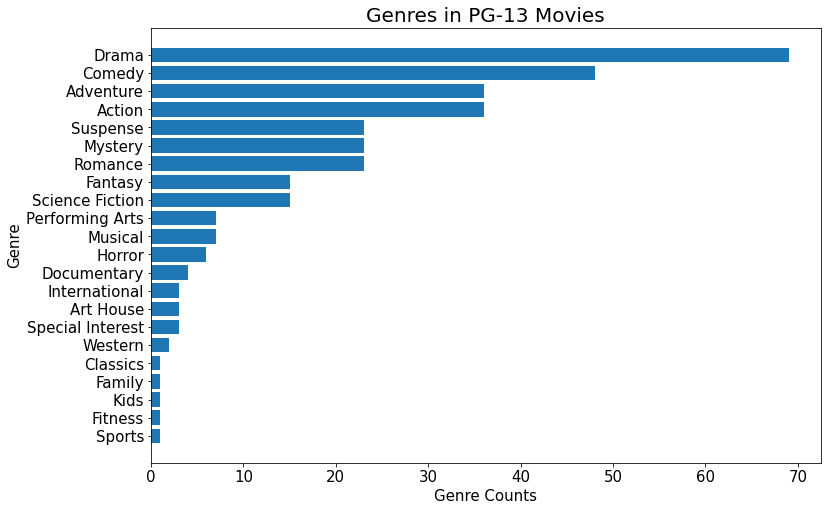

In [8]:
# Make a bar graph with the genre and their counts
fig, ax = plt.subplots(figsize=(12, 8))

# Set x to be the genres and set y to be the counts
x = list(genre_dict.keys())
height = list(genre_dict.values())

ax.barh(x, height)
ax.set_title('Genres in PG-13 Movies', fontsize=20)
ax.set_xlabel('Genre Counts', fontsize=15)
ax.set_ylabel('Genre', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.savefig('images/pg_13_genre.png', bbox_inches = "tight")

We see that Drama, Comedy, Adventure, and Action are the most popular genres in PG-13 movies.
Let's see if the genres have a good average profit margin .

## Profit Margin

In [9]:
# Import necessary data to find profit margin
title_basics = pd.read_csv('data/imdb.title.basics.csv.gz')
movie_budgets = pd.read_csv('data/tn.movie_budgets.csv.gz')

With the two data tables, we will merge them using movie title and year the movie was released so that we can have one dataframe with production budget, worldwide gross, and genres variables. There were movies with same title but were not the same movie. So, we also use the year to merge the table as well.

In [10]:
# Create a column for year in movie_budget table
# Since release date is in "month day, year" format, we are going to take only the last four string of the release date and 
# we are going to change the year to float
movie_budgets['release_year'] = movie_budgets['release_date'].str[-4:].astype(float)

#Combine movie_budget table with title_basics using movie title and released year
profit = movie_budgets.merge(title_basics, how='left', left_on=['movie', 'release_year'], right_on=['original_title', 'start_year'])

### Clean Data

The dataframe now needs to be cleaned. We will drop any null values and duplicates from the data table.

In [11]:
# Drop null values
profit.dropna(inplace=True)

In [12]:
# Make a new dataframe with just the columns we need
condensed_profit = profit[['movie', 'genres', 'production_budget', 'domestic_gross', 'worldwide_gross']]

# Drop any duplicates
condensed_profit = condensed_profit.drop_duplicates(subset=['movie'])

# Change the columns that are string numbers to float
# First, we remove the , by replace , with ''
# Since the production budget, domestic gross, worldwide gross has a dollar sign in the front,
# we want to take every after the dollar sign and make them into floats
condensed_profit['production_budget'] = condensed_profit['production_budget'].str.replace(',', '').str[1:].astype(float)
condensed_profit['domestic_gross'] = condensed_profit['domestic_gross'].str.replace(',', '').str[1:].astype(float)
condensed_profit['worldwide_gross'] = condensed_profit['worldwide_gross'].str.replace(',', '').str[1:].astype(float)

Now, we will use wordwide_gross and production_budget to find the profit of the movie. We also found the net profit margin because we wanted to make sure that the movie generated enough profit from its sales and whether production budget was being contained.

In [13]:
condensed_profit['profit'] = condensed_profit['worldwide_gross'] - condensed_profit['production_budget']
condensed_profit['net_profit_margin'] = (condensed_profit['profit'] / condensed_profit['worldwide_gross']) * 100

With the cleaned data, we want to get the average profit margin for Drama, Comedy, Adventure, and Action genres.

In [14]:
# Make a list of top 4 genres from the Genres in PG-13 Movies bar graph
top4_genre_pg13 = list(genre_dict.keys())[-4:]

# Create a new dataframe so that we have data that have profit margin above 0%
condensed_profit_split_genre = condensed_profit[condensed_profit['net_profit_margin'] >= 0]

# Split the genres for each movie by comma
condensed_profit_split_genre['genres'] = condensed_profit_split_genre['genres'].map(lambda x : x.split(','))

genre_profit_margin = {}

# For each genre in the top 3 genre list, make a list of profit margin for that certain genre
for genre in top4_genre_pg13:
    genre_profit_margin[genre] = []
    for index, row in condensed_profit_split_genre.iterrows():
        if genre in row['genres']:
            genre_profit_margin[genre].append(row['net_profit_margin'])

average_profit_margin_genre = {}

# For each genre, find the average of profit margin
for k,v in genre_profit_margin.items():
    average_profit_margin_genre[k] = sum(v)/ float(len(v))

<ipython-input-14-fb322666a210>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  condensed_profit_split_genre['genres'] = condensed_profit_split_genre['genres'].map(lambda x : x.split(','))


## Visualization

Now, with the data of average profit margin we found above, we created a bar graph to show average profit margin for the top 4 genres in PG-13 movies

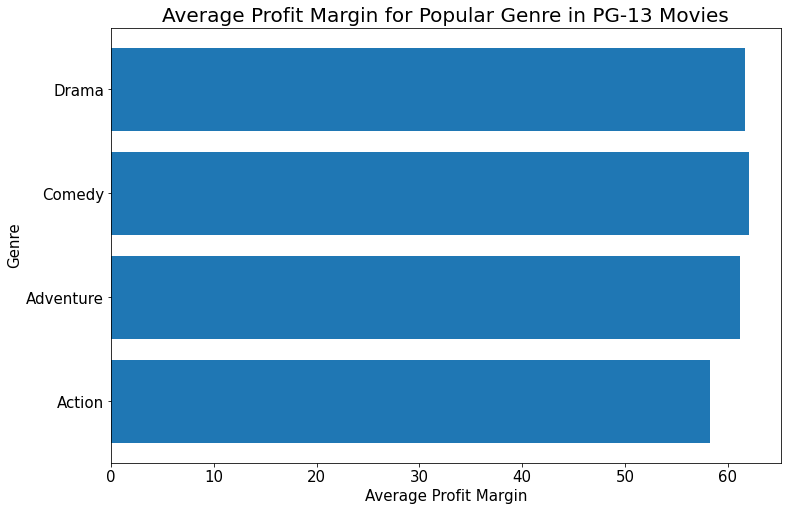

In [16]:
# Make a bar graph with the genre and their average profit margin
fig, ax = plt.subplots(figsize=(12, 8))

# Set x to be the genres and set y to be the aaverage profit margins
x = list(average_profit_margin_genre.keys())
height = list(average_profit_margin_genre.values())

ax.barh(x, height)
ax.set_title('Average Profit Margin for Popular Genre in PG-13 Movies', fontsize=20)
ax.set_xlabel('Average Profit Margin', fontsize=15)
ax.set_ylabel('Genre', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.savefig('images/average_profit_margin_pg_13_genre.png', bbox_inches = "tight")